<a href="https://colab.research.google.com/github/svetlanama/Data-Science-in-Finance-/blob/main/DSIF7_0_Intro_to_deep_learning_and_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Welcome to our class on deep learning and neural networks.
In this session, we will introduce basic concepts of neural networks, key parameters and concepts in deep learning, and how these models are used in financial tasks like creditworthiness prediction.

## Agenda:
1. Useful concepts
2. Data preprocessing
3. Building a neural network model
4. Assignment overview




# 1. Useful concepts
An **activation function** determines the output of a neuron given an input or set of inputs. They introduce non-linearity into the network, allowing it to learn from errors and improve.

**Common activation functions:**
| **Activation Function**    | **Description**                                                                                       |
|----------------------------|-------------------------------------------------------------------------------------------------------|
| **Linear**                 | Not so useful for deep learning; can't perform backpropagation, essential for training multi-layer networks. |
| **Binary**                 | On/off activation; limited for complex classification; vertical slopes hinder calculus, ineffective for modern networks. |
| **Non-linear** (key to DL) | Essential for complex mappings, backpropagation, and multiple layers. Examples below.  |


**Common NON LINEAR activation functions:**
| **Activation Function**    | **Description**                                                                                       |
|----------------------------|-------------------------------------------------------------------------------------------------------|
| **Sigmoid (Logistic)**      | Scales outputs between 0 and 1; common for binary classification but suffers from vanishing gradients. |
| **Tanh (Hyperbolic)**       | Scales between -1 and +1; better for RNNs, but faces vanishing gradient issues and is computationally expensive. |
| **ReLU**                    | Popular for simplicity and speed; becomes linear when <= 0, limiting learning.                        |
| **Leaky ReLU**              | Introduces a negative slope for values below 0, solving the zeroing-out problem.                      |
| **Parametric ReLU (PReLU)** | Similar to Leaky ReLU, but slope is learned via backpropagation; computationally intensive.            |
| **Other ReLU Variants**     | Includes ELU (Exponential), Google’s Swish (deep networks), Maxout (powerful but impractical).         |
| **Softmax**                 | Converts outputs to probabilities; used for single-label classification; Sigmoid handles multi-label tasks. |


**Loss function:** Measures the difference between the predicted output and the actual target. The goal is to minimize this loss during training.
  - Example: Mean Squared Error (MSE), Cross-Entropy Loss.
  
**Optimization algorithms:** Methods used to minimize the loss function by adjusting the network's weights.
  - **Gradient Descent:** The most common optimization algorithm, which updates the model's parameters by computing the gradient of the loss function.
  - **Adam** is a popular stochastic gradient descent method that is computationally efficient, has little memory requirement and is well suited for problems that are large in terms of data/parameters.
  - **Learning Rate:** A hyperparameter that controls how much the model's parameters are adjusted with each step of the optimization.

**Number of layers and neurons:** More layers and neurons can capture more complex patterns but may lead to overfitting if not managed properly.

**Regularization:** Techniques like dropout or L2 regularization help prevent overfitting by adding constraints to the model.

---

## Popular Python Frameworks for Neural Networks

### Overview of Popular Frameworks
- **TensorFlow and Keras:** Developed by Google, Keras is a high-level API that runs on top of TensorFlow. It's user-friendly and great for beginners.
- **PyTorch:** Developed by Facebook, PyTorch is popular in academia for its flexibility and ease of debugging.

**For This Course:**  
We’ll focus on TensorFlow/Keras due to its simplicity and wide adoption in the industry.

---

Demo: Implementation in Python
------------------------------

### LendingClub Use Case


---


### Set up

#### User-specified parameters

In [ ]:
python_material_folder_name = "python-material"

#### Import libraries

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True

    import os
    import sys

    # Get the current working directory (notebook's directory)
    notebook_dir = f"{path_python_material}/notebooks"
    print(notebook_dir)

    if notebook_dir not in sys.path:
      sys.path.append(notebook_dir)

except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

#### Import data

In [ ]:
# Read data that was exported from previous session
df = pd.read_csv(f"{path_python_material}/data/2-intermediate/df_out_dsif6.csv")#.sample(10000, random_state=800)
df.head()

,loan_amnt,installment,annual_inc,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,last_pymnt_amnt_log,last_pymnt_amnt_capped,int_rate_clean,term_numeric,debt_to_income,interest_per_loan_amnt,loan_amnt_log,grade_encoded,loan_amnt_std,annual_inc_std,loan_amnt_norm,annual_inc_norm,loan_default
0,4000.0,134.93,48000.0,1.0,665.0,669.0,0.0,4.0,1.0,1988.0,12.0,183.66,83.29,0.0,0.0,0.0,134.93,669.0,665.0,1.0,1.0,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,6262.5,57.3,0.0,0.0,179.0,75.0,38.0,16.0,2.0,14.0,16.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,33.3,1.0,0.0,395328.0,11948.0,0.0,17928.0,4.912140,134.93,0.1308,36,0.083333,1569.6,8.294300,1,-1.196895,-0.367206,0.083969,0.004364,False
1,24000.0,500.07,57000.0,0.0,680.0,684.0,0.0,10.0,0.0,22697.0,24.0,19666.71,5829.45,0.0,0.0,0.0,500.07,704.0,700.0,0.0,1.0,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,24.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,6.216746,500.07,0.0916,60,0.421053,10992.0,10.085851,1,0.915452,-0.264024,0.592875,0.005182,False
2,5000.0,162.49,55000.0,0.0,665.0,669.0,0.0,7.0,1.0,6001.0,9.0,5000.00,846.67,0.0,0.0,0.0,162.43,789.0,785.0,0.0,1.0,0.0,0.0,159131.0,0.0,0.0,0.0,0.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,11400.0,0.0,0.0,0.0,4.0,22733.0,4521.0,54.8,0.0,0.0,57.0,57.0,14.0,9.0,1.0,14.0,1.0,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0,5.096385,162.43,0.1049,36,0.090909,1573.5,8.517393,1,-1.091278,-0.286953,0.109415,0.005000,False
3,24000.0,522.42,43500.0,0.0,750.0,754.0,0.0,15.0,0.0,6573.0,23.0,7682.31,4318.62,0.0,0.0,0.0,522.42,749.0,745.0,0.0,1.0,0.0,0.0,104590.0,2.0,1.0,0.0,1.0,17.0,11947.0,60.0,2.0,3.0,2223.0,25.0,54500.0,2.0,0.0,2.0,4.0,6973.0,43140.0,12.0,0.0,0.0,37.0,132.0,1.0,1.0,2.0,1.0,3.0,1.0,6.0,7.0,11.0,16.0,2.0,13.0,19.0,7.0,15.0,0.0,0.0,0.0,2.0,95.7,0.0,0.0,0.0,202606.0,18520.0,49000.0,20000.0,6.260384,522.42,0.1105,60,0.551724,13260.0,10.085851,1,0.915452,-0.418798,0.592875,0.003955,False
4,14000.0,322.79,48000.0,0.0,735.0,739.0,1.0,16.0,0.0,11894.0,23.0,14000.00,2605.68,0.0,0.0,0.0,11128.82,779.0,775.0,0.0,1.0,0.0,0.0,90253.0,2.0,2.0,1.0,1.0,7.0,22953.0,60.0,3.0,4.0,3907.0,43.0,43900.0,1.0,0.0,2.0,5.0,5641.0,17318.0,39.9,0.0,0.0,72.0,117.0,6.0,6.0,2.0,6.0,5.0,0.0,4.0,5.0,5.0,6.0,5.0,13.0,16.0,5.0,16.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,152081.0,34847.0,28800.0,38181.0,9.317383,11128.82,0.1359,60,0.291667,9513.0,9.546884,2,-0.140722,-0.367206,0.338422,0.004364,False


### <span style="color:RED"> **>>> NOTE:**  </span>    
> **Make sure to have plenty of data!**

In [ ]:
df.shape

(100000, 87)

# 2. Data preprocessing

Neural networks expect data in a specific format and often require transformations to perform effectively. Here's a brief overview.

-   **Numerical Input Data:**
    -   **Transformation:** Convert categorical data to numerical using techniques like one-hot encoding or label encoding. Convert categorical target labels to integers or one-hot encoded vectors.
    -   **Why:** Neural networks can't process strings or categorical data directly.

-   **Feature Scaling:**
    -   **Transformation:** Apply normalization (e.g., min-max scaling) or standardization (e.g., z-score normalization).
    -   **Why:** Neural networks converge faster and perform better when input features are on a similar scale, preventing dominance of features with larger magnitudes.
    
-   **Handling Missing Data:**
    -   **Transformation:** Impute missing values (e.g., using mean/mode imputation) or remove rows/columns with missing data.
    -   **Why:** Missing data can lead to inaccurate training or model errors if not addressed.


In [ ]:
# Let's use same features used by model previously built, plus the categorical ones
features = ['installment', 'revol_bal', 'recoveries', 'collection_recovery_fee',
       'last_fico_range_high', 'last_fico_range_low', 'tot_cur_bal',
       'open_acc_6m', 'open_il_24m', 'total_bal_il', 'inq_fi',
       'acc_open_past_24mths', 'bc_util', 'mo_sin_old_il_acct',
       'percent_bc_gt_75', 'total_il_high_credit_limit',
       'last_pymnt_amnt_capped', 'grade_encoded', 'annual_inc_std']
# Note: 'last_pymnt_amnt_log' excluded for now because it containted some null values which was problematic for the below modelling part
# Could you think of an alternative way to tackle this problem?

X = df[features]
y = df['loan_default']

print(f"Number of features: {len(features)}")

Number of features: 19


In [ ]:
X.head()

,installment,revol_bal,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low,tot_cur_bal,open_acc_6m,open_il_24m,total_bal_il,inq_fi,acc_open_past_24mths,bc_util,mo_sin_old_il_acct,percent_bc_gt_75,total_il_high_credit_limit,last_pymnt_amnt_capped,grade_encoded,annual_inc_std
0,134.93,1988.0,0.0,0.0,669.0,665.0,259024.0,0.0,1.0,9960.0,1.0,1.0,57.3,179.0,33.3,17928.0,134.93,1,-0.367206
1,500.07,22697.0,0.0,0.0,704.0,700.0,61815.0,0.0,3.0,39118.0,0.0,4.0,40.5,145.0,60.0,52954.0,500.07,1,-0.264024
2,162.49,6001.0,0.0,0.0,789.0,785.0,159131.0,0.0,0.0,0.0,0.0,4.0,54.8,57.0,33.3,7526.0,162.43,1,-0.286953
3,522.42,6573.0,0.0,0.0,749.0,745.0,104590.0,2.0,1.0,11947.0,2.0,4.0,12.0,37.0,0.0,20000.0,522.42,1,-0.418798
4,322.79,11894.0,0.0,0.0,779.0,775.0,90253.0,2.0,1.0,22953.0,1.0,5.0,39.9,72.0,0.0,38181.0,11128.82,2,-0.367206


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling (alternative: StandardScaler for z-score normalization)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with same column names
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head()

,installment,revol_bal,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low,tot_cur_bal,open_acc_6m,open_il_24m,total_bal_il,inq_fi,acc_open_past_24mths,bc_util,mo_sin_old_il_acct,percent_bc_gt_75,total_il_high_credit_limit,last_pymnt_amnt_capped,grade_encoded,annual_inc_std
0,0.066234,0.001795,0.0,0.0,0.787059,0.786982,0.064183,0.000000,0.035714,0.010777,0.041667,0.023810,0.327429,0.179179,0.333,0.017414,0.048815,0.166667,0.004364
1,0.281361,0.020488,0.0,0.0,0.828235,0.828402,0.015317,0.000000,0.107143,0.042328,0.000000,0.095238,0.231429,0.145145,0.600,0.051437,0.068886,0.166667,0.005182
2,0.082471,0.005417,0.0,0.0,0.928235,0.928994,0.039431,0.000000,0.000000,0.000000,0.000000,0.095238,0.313143,0.057057,0.333,0.007310,0.050327,0.166667,0.005000
3,0.294529,0.005933,0.0,0.0,0.881176,0.881657,0.025916,0.153846,0.035714,0.012927,0.083333,0.095238,0.068571,0.037037,0.000,0.019427,0.070114,0.166667,0.003955
4,0.176914,0.010737,0.0,0.0,0.916471,0.917160,0.022364,0.153846,0.035714,0.024837,0.041667,0.119048,0.228000,0.072072,0.000,0.037087,0.653100,0.333333,0.004364


What can you observe now?

# 3. Building a neural network model

We'll use TensorFlow/Keras, and refer to a simple parallel with the brain in the commentary to explain what is going on..

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (returns pandas dfs)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=123)

## 3.1 Starting with a simple architecture

### Dense relu -> Dense relu -> Dense sigmoid



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize the model (empty intiially)
model = Sequential()

# Adding layers to our model, which are like different parts of the brain.
# Each layer has "neurons" (like tiny decision-makers):

# Add the first part of our brain that looks at the data
model.add(Dense(16, input_dim=X_scaled_df.shape[1], activation='relu'))

# smaller brain part that processes what the first layer has figured out.
model.add(Dense(8, activation='relu'))

#This is like the brain's decision-making part, where it makes a yes/no decision (like "Will this person pay back their loan?").
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer='adam', # like the brain’s coach, guiding it to get better and better at its task
    loss='binary_crossentropy', # how the brain measures its mistakes,  for optimisation
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
    )

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **Note**: In older tensorflow versions, keras import syntax would have been:
```
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
```

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2 )


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step - AUC: 0.7982 - Precision: 0.5033 - Recall: 0.2459 - accuracy: 0.8562 - loss: 0.3263 - val_AUC: 0.9742 - val_Precision: 0.8947 - val_Recall: 0.7476 - val_accuracy: 0.9574 - val_loss: 0.1289
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - AUC: 0.9782 - Precision: 0.9269 - Recall: 0.7106 - accuracy: 0.9566 - loss: 0.1148 - val_AUC: 0.9805 - val_Precision: 0.8832 - val_Recall: 0.8075 - val_accuracy: 0.9626 - val_loss: 0.1037
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - AUC: 0.9804 - Precision: 0.9153 - Recall: 0.7795 - accuracy: 0.9641 - loss: 0.1000 - val_AUC: 0.9806 - val_Precision: 0.8874 - val_Recall: 0.8104 - val_accuracy: 0.9634 - val_loss: 0.0977
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - AUC: 0.9821 - Precision: 0.9124 - Recall: 0.8077 - accuracy: 0.9667 - loss: 0.0910 - val_AUC: 0.9812 - val_Precision: 0.9153 - val_Recall: 0.7961 - val_accuracy: 0.9653 - val_loss: 0.0955
Epoch 5/10
1750/

#### What is going on here?
-   **Epochs (10):** The brain goes through all the data 10 times, learning a bit more with each pass.  
-   **Batch Size (32):** The brain practices on 32 examples at a time.
-   **Validation Split (0.2):** We set aside 20% of the data to test the brain and see how well it's learning.

In [ ]:
# How does this compare to model built in previous sessions?

# Make predictions
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5)


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step


In [ ]:
from dsif6utility import model_evaluation_report
model_evaluation_report(X_test, y_test, y_pred, y_prob)

Accuracy: 0.9670333333333333
Precision: 0.9380645161290323
Recall: 0.784885290148448
F1-Score: 0.8546656869948567
ROC-AUC: 0.9840338688076402
Confusion Matrix:
[[26103   192]
 [  797  2908]]


### Interpreting outputs produced
Let's look at the probability scores produced:

In [ ]:
# Set float format to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

y_prob = pd.DataFrame(y_prob, columns=["prob"])
y_prob.prob.describe(percentiles = [i / 100 for i in [0, 1, 10, 25, 50, 75, 90, 95, 99, 100]])

count   30000.00
mean        0.11
std         0.29
min         0.00
0%          0.00
1%          0.00
10%         0.00
25%         0.00
50%         0.00
75%         0.02
90%         0.57
95%         1.00
99%         1.00
100%        1.00
max         1.00
Name: prob, dtype: float64

### <span style="color:BLUE"> **>>> DISCUSSION:**  </span>    
> What do you notice?

To achieve a wider range of probabilities in your neural network output, you can consider the following modifications:

**Change the output layer activation function**
If your task requires predicting probabilities for multiple classes, use the `softmax` activation function instead of `sigmoid`. For binary classification, `sigmoid` is appropriate, but if you're observing outputs mostly at the extremes (0 or 1), consider adjusting the model complexity.

**Increase model complexity**
You can add more layers or increase the number of neurons in the existing layers to allow the model to learn more complex patterns.

**Regularization techniques**
Consider adding dropout layers to prevent overfitting, which can sometimes lead to extreme outputs.

**Adjust the loss function**
If your output is indeed binary but you want probabilities that are not strictly 0 or 1, ensure that you balance your dataset or adjust class weights during training.

## 3.2 Some pointers/examples for NNs architectures


The following table includes a brief description of each architecture's structure and its rationale, providing a clearer understanding of why each architecture is suited for its respective use case.

| Neural Network Type | Structure | Use Case | Links | Description |
| --- | --- | --- | --- | --- |
| **Basic Feedforward Neural Network** | Dense (ReLU) → Dense (ReLU) → Dense (Sigmoid) | Binary Classification | [Sonar, Mines vs. Rocks example](https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/) | Simple architecture for binary classification; fully connected layers enable learning complex relationships. |
| **Simple Neural Network for Classification** | Dense (ReLU) → Dense (Softmax) | Multi-Class Classification | [Iris Dataset example](https://lnwatson.co.uk/posts/intro_to_nn/) | Designed for multi-class classification; softmax activation allows for probability distribution across multiple classes. |
| **Convolutional Neural Network (CNN)** | Conv2D (ReLU) → flatten → Dense (Softmax) | Image Classification | [mnist image recognition example](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5) | Effective for image data; convolutional layers capture spatial hierarchies, while pooling reduces dimensionality. |
| **Recurrent Neural Network (RNN)** | LSTM → Dense (Sigmoid) | Time Series Prediction | [lstm for time series example](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/) | Suitable for sequential data; LSTMs manage long-term dependencies in time series or text inputs. |
| **Autoencoder** | Dense (ReLU) → Dense (ReLU) → Dense (Bottleneck) → Dense (ReLU) → Dense (Sigmoid) | Unsupervised Learning, Feature Extraction, Fraud detection | [Autoencoders example](https://blog.keras.io/building-autoencoders-in-keras.html) | Unsupervised learning for feature extraction; compresses input data into a lower-dimensional representation. |
| **Generative Adversarial Network (GAN)** | Dense (ReLU) → Dense (Output) (Generator) and Dense (ReLU) → Dense (Output) (Discriminator) | Synthetic data generation, Fraud detection | [GANs example](https://medium.com/@marcodelpra/generative-adversarial-networks-dba10e1b4424) | Two competing networks create new data; the generator learns to produce realistic samples while the discriminator assesses them. |


## 3.3 Calculating sample size required - Rule of thumb

**Rule of 10**, namely the amount of training data you need for a well performing model is 10x the number of parameters in the model. ([source](https://malay-haldar.medium.com/how-much-training-data-do-you-need-da8ec091e956#:~:text=This%20leads%20us%20to%20the,of%20parameters%20in%20the%20model.))

To determine the appropriate sample size based on the rule of 10, we first need to calculate the total number of parameters in your model. Here's how to do that step-by-step:

### i \. **Calculate Parameters for Each Layer**

For a `Dense` layer, the number of parameters can be calculated as:

Parameters=(number of inputs+1)×(number of neurons)

-   **Input Layer:** The first layer has `input_dim` neurons, which is the number of features in your dataset.
-   **Hidden Layer 1:** Has 16 neurons.
-   **Hidden Layer 2:** Has 8 neurons.
-   **Output Layer:** Has 1 neuron.

### ii \. **Calculate the Total Parameters**

Assuming your input has n features:

-   **First Layer:** (n+1)×16  
-   **Second Layer:** (16+1)×8= 136  
-   **Output Layer:** (8+1)×1= 9  

### iii \. **Putting It Together**

#### Total Parameters:  
To ensure a well-performing model, your sample size should be at least:  

Sample Size = 10 * [(n+1)×16 + 136 + 9]



### Example Calculation

If you have, for example, 20 features:

Sample Size = 10 * [(20+1)×16 + 136 + 9] = 4810

So, if your input has 20 features, you should aim for at least **4810 samples** for training your model. Adjust the calculation based on the actual number of features in your dataset.

## 3.4 Detecting and dealing with overfitting in NNs

In [ ]:
history.history['val_AUC']

[0.9741565585136414,
 0.9805269241333008,
 0.9806495904922485,
 0.9812343120574951,
 0.9810924530029297,
 0.9818577766418457,
 0.9787722229957581,
 0.982123613357544,
 0.9816346764564514,
 0.9818929433822632]

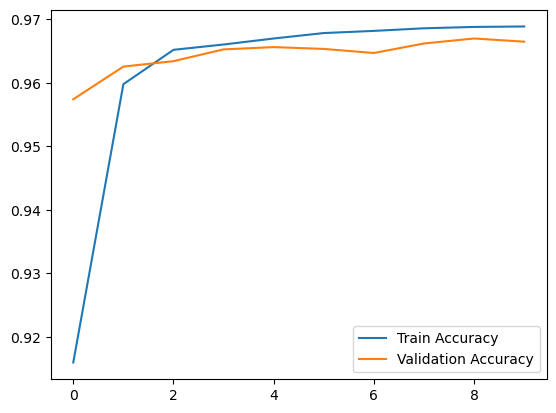

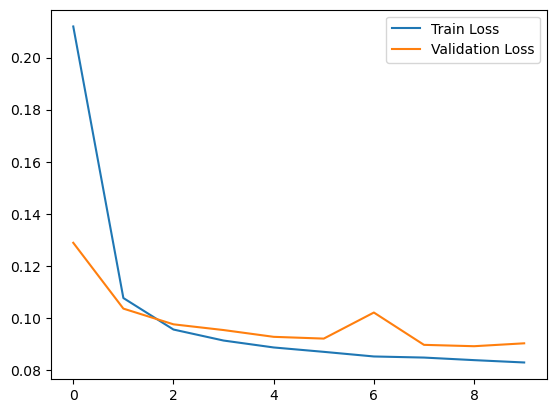

In [ ]:
def plot_training_vs_overfitting(history):
    """Plot training and validation accuracy to detect overfitting (when gap between 2 is detected)"""
    import matplotlib.pyplot as plt

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.show()

plot_training_vs_overfitting(history)

### <span style="color:BLUE"> **>>> DISCUSSION:**  </span>    
> How can we see if there is any suspected overfitting?

### Common techniques to deal with overfitting:

#### i\. **Add a Dropout Layer**

Dropout is a regularization technique that randomly "drops out" a fraction of the neurons during training, forcing the model to learn more robust features.


In [ ]:
from keras.layers import Dropout

# Initialize the model
model2 = Sequential()

# First hidden layer with Dropout
model2.add(Dense(16, input_dim=X_scaled_df.shape[1], activation='relu'))
model2.add(Dropout(0.5))  # Drop 50% of neurons

# Second hidden layer with Dropout
model2.add(Dense(8, activation='relu'))
model2.add(Dropout(0.5))  # Drop 50% of neurons

# Output layer
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 329us/step - AUC: 0.6414 - Precision: 0.2354 - Recall: 0.0281 - accuracy: 0.8629 - loss: 0.4069 - val_AUC: 0.9611 - val_Precision: 0.9584 - val_Recall: 0.4603 - val_accuracy: 0.9300 - val_loss: 0.1844
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - AUC: 0.9275 - Precision: 0.8169 - Recall: 0.3031 - accuracy: 0.9043 - loss: 0.2120 - val_AUC: 0.9764 - val_Precision: 0.9556 - val_Recall: 0.6642 - val_accuracy: 0.9541 - val_loss: 0.1354
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - AUC: 0.9519 - Precision: 0.8264 - Recall: 0.4370 - accuracy: 0.9179 - loss: 0.1718 - val_AUC: 0.9778 - val_Precision: 0.8851 - val_Recall: 0.8053 - val_accuracy: 0.9626 - val_loss: 0.1122
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - AUC: 0.9603 - Precision: 0.8216 - Recall: 0.7454 - accuracy: 0.9485 - loss: 0.1576 - val_AUC: 0.9773 - val_Precision: 0.8789 - val_Recall: 0.8207 - val_accuracy: 0.9634 - val_loss: 0.1062
Epoch 5/10
1750/

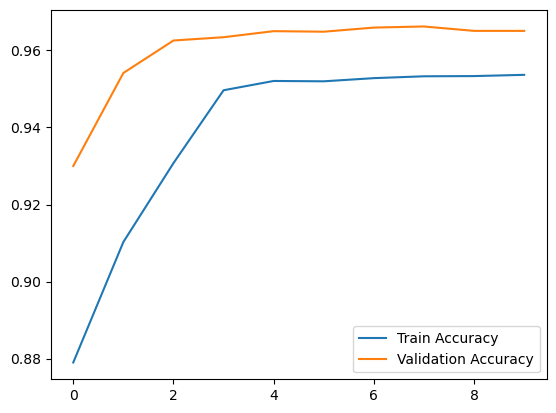

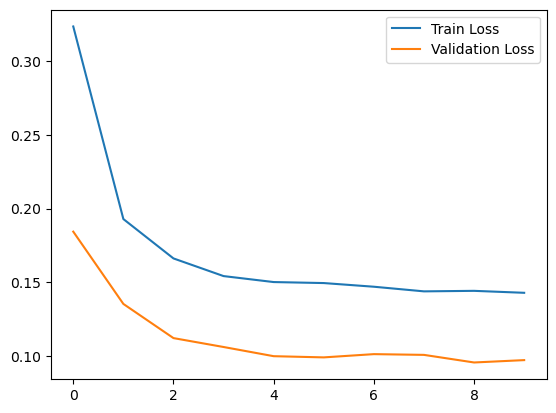

In [ ]:
# Train the model
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plot_training_vs_overfitting(history2)

#### Interpretation
- Dropout randomly drops neurons during training, forcing the model to learn more robust representations.
- During training, this makes it harder for the network to memorize patterns, leading to lower training accuracy.
- However, at validation time, dropout is turned off, meaning the full network is used, allowing the model to make better predictions with all neurons active.


#### 2\. **Early Stopping**

Early stopping halts training once the performance on the validation data stops improving. This prevents the model from overfitting after a certain point.


Epoch 1/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - AUC: 0.9830 - Precision: 0.9145 - Recall: 0.8248 - accuracy: 0.9689 - loss: 0.0834 - val_AUC: 0.9831 - val_Precision: 0.9229 - val_Recall: 0.8011 - val_accuracy: 0.9672 - val_loss: 0.0862
Epoch 2/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 1s 306us/step - AUC: 0.9827 - Precision: 0.9194 - Recall: 0.8223 - accuracy: 0.9692 - loss: 0.0831 - val_AUC: 0.9824 - val_Precision: 0.9505 - val_Recall: 0.7773 - val_accuracy: 0.9675 - val_loss: 0.0885
Epoch 3/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - AUC: 0.9821 - Precision: 0.9170 - Recall: 0.8189 - accuracy: 0.9682 - loss: 0.0848 - val_AUC: 0.9840 - val_Precision: 0.8861 - val_Recall: 0.8440 - val_accuracy: 0.9673 - val_loss: 0.0856
Epoch 4/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - AUC: 0.9848 - Precision: 0.9170 - Recall: 0.8320 - accuracy: 0.9692 - loss: 0.0813 - val_AUC: 0.9833 - val_Precision: 0.9469 - val_Recall: 0.7887 - val_accuracy: 0.9684 - val_loss: 0.0847


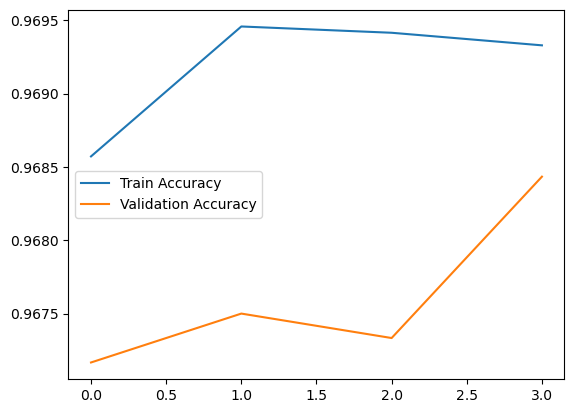

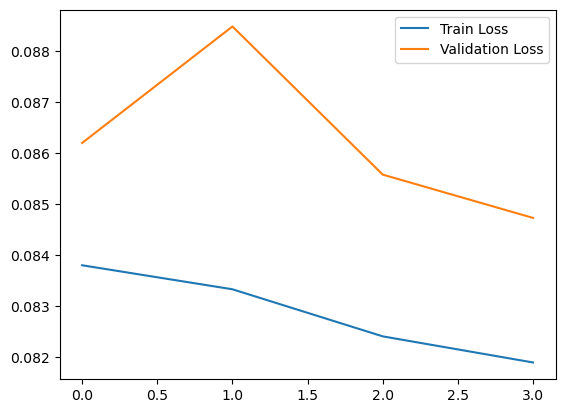

In [ ]:
from keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_Precision',  # Evaluation metric to watch
    mode='max',
    patience=2,               # Stop if no improvement after <X> epochs
    restore_best_weights=True  # Restore the model weights at the best epoch
)

# Train with early stopping
history3 = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)
plot_training_vs_overfitting(history3)

#### 3\. **Reduce Model Complexity**
Sometimes, your model may be too complex (too many layers or neurons). You can simplify it by reducing the number of hidden layers or neurons per layer.

#### 4\. **Data Augmentation**
If possible, increase the amount of training data by augmenting it. More data can help the model generalize better, especially in tasks like image recognition (though it's less applicable for tabular data).

#### 5\. **Regularization (L2)**
L2 regularization (also called weight decay) adds a penalty for large weights, which helps prevent overfitting.


In [ ]:
from keras.regularizers import l2

# Add L2 regularization to the model
model4 = Sequential()
model4.add(Dense(16, input_dim=X_scaled_df.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model4.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])


/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - AUC: 0.7371 - Precision: 0.1228 - Recall: 0.0598 - accuracy: 0.8322 - loss: 0.4909 - val_AUC: 0.9506 - val_Precision: 0.8880 - val_Recall: 0.1856 - val_accuracy: 0.8952 - val_loss: 0.2934
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - AUC: 0.9573 - Precision: 0.9176 - Recall: 0.2579 - accuracy: 0.9057 - loss: 0.2745 - val_AUC: 0.9683 - val_Precision: 0.8999 - val_Recall: 0.3798 - val_accuracy: 0.9171 - val_loss: 0.2433
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - AUC: 0.9696 - Precision: 0.8934 - Recall: 0.5011 - accuracy: 0.9325 - loss: 0.2285 - val_AUC: 0.9691 - val_Precision: 0.8781 - val_Recall: 0.5266 - val_accuracy: 0.9316 - val_loss: 0.2185
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - AUC: 0.9712 - Precision: 0.8738 - Recall: 0.6160 - accuracy: 0.9416 - loss: 0.2084 - val_AUC: 0.9697 - val_Precision: 0.8360 - val_Recall: 0.6870 - val_accuracy: 0.9440 - val_loss: 0.2026
Epoch 5/10
1750/

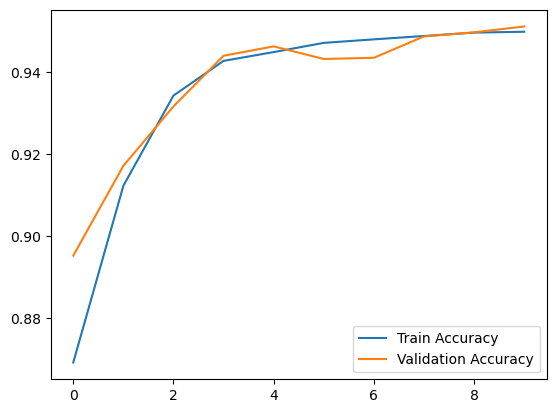

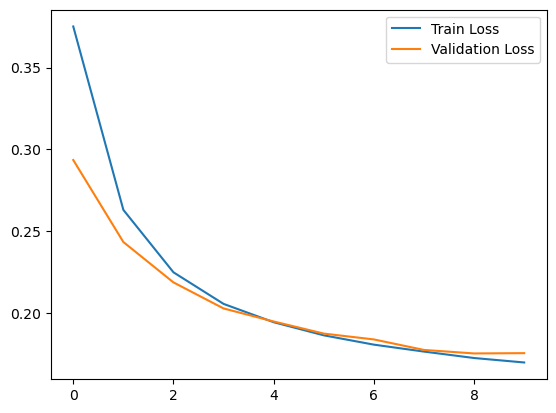

In [ ]:
# Train the model
history4 = model4.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plot_training_vs_overfitting(history4)

# 4. Assignment overview

### Part 1 - Mandatory
**Develop a challenger model:** \
Using the concepts from **Session 7** and **Session 8**, create a challenger model to compare against the `model` and `model_2` built in **Session 5**. Name your new model `model_3`. Explore various architectures, models, activation functions, and other hyperparameters to improve performance.

> Experiment with different combinations of optimizers, loss functions, and metrics to evaluate how they affect training speed, overall performance, and the final model's accuracy. This will help you fine-tune your model for the specific problem you're addressing.

> Add at least one additional hidden layer. Observe how this affects the model's performance and overfitting and make note of the differences.

Link to assignment scoring criteria [here](https://docs.google.com/spreadsheets/d/1UXef6HO4hNWv9OiViYsUS-qNzY4ykKV5/edit?gid=711633108#gid=711633108).

# End of session

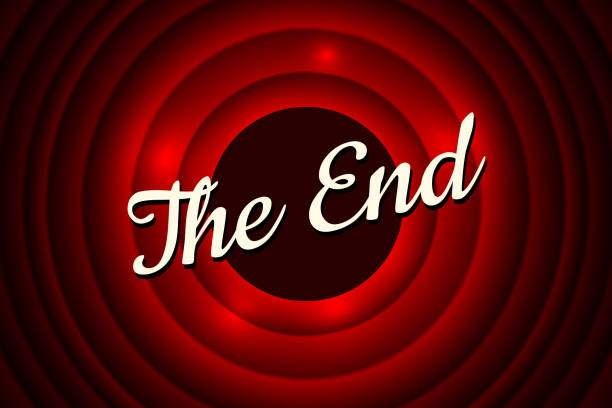

In [ ]:
from IPython.display import Image
Image(filename=f"{path_python_material}/images/the-end.jpg", width=500,)


# Appendix

## Best practices for choosing activation functions:

-   **ReLU (Rectified Linear Unit)**:

    -   **Default choice for hidden layers** in most neural networks.
    -   **Fast and simple**, helps avoid the vanishing gradient problem.
    -   Use with caution if inputs can be negative or if your model isn't learning well (may cause "dying ReLUs").
-   **Leaky ReLU**:

    -   **Use when ReLU is causing dead neurons** (outputs stuck at 0).
    -   Allows a small, non-zero gradient when the input is negative.
-   **Sigmoid**:

    -   Good for **binary classification output layers** (produces a probability between 0 and 1).
    -   Avoid in hidden layers due to the **vanishing gradient problem**.
-   **Tanh (Hyperbolic Tangent)**:

    -   Use when outputs need to range between **-1 and 1**.
    -   **Better than Sigmoid** for hidden layers but still prone to vanishing gradients.
-   **Softmax**:

    -   Ideal for **multi-class classification output layers**.
    -   Outputs a probability distribution over multiple classes (sums to 1).

-   **Linear**:

    -   Use in the **output layer for regression tasks** (predicting continuous values).
    -   No non-linearity is applied, so the output is a linear combination of inputs.


## Changing Optimizer, Loss, and Metrics: What to Expect

Changing the **optimizer**, **loss**, and **metrics** in a neural network can have a significant impact on model performance, convergence speed, and the accuracy of predictions.

More info here: https://www.tensorflow.org/api_docs/python/tf/keras
